Team= ML_questers

In [1]:
                                                                                                                                                                                                                                                          import keras
from keras.layers import Activation, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random
import warnings
import io
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving UrbanSound8K.csv to UrbanSound8K.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['UrbanSound8K.csv']))
print(df)

         slice_file_name    fsID       start  ...  fold  classID             class
0       100032-3-0-0.wav  100032    0.000000  ...     5        3          dog_bark
1     100263-2-0-121.wav  100263   60.500000  ...     5        2  children_playing
2     100263-2-0-126.wav  100263   63.000000  ...     5        2  children_playing
3     100263-2-0-137.wav  100263   68.500000  ...     5        2  children_playing
4     100263-2-0-143.wav  100263   71.500000  ...     5        2  children_playing
...                  ...     ...         ...  ...   ...      ...               ...
8717     99812-1-2-0.wav   99812  159.522205  ...     7        1          car_horn
8718     99812-1-3-0.wav   99812  181.142431  ...     7        1          car_horn
8719     99812-1-4-0.wav   99812  242.691902  ...     7        1          car_horn
8720     99812-1-5-0.wav   99812  253.209850  ...     7        1          car_horn
8721     99812-1-6-0.wav   99812  332.289233  ...     7        1          car_horn

[87

In [4]:
df.shape

(8722, 8)

In [5]:
data=df[['slice_file_name','fold','classID','class']][df['end']-df['start']>=3]
data.head()

,slice_file_name,fold,classID,class
1,100263-2-0-121.wav,5,2,children_playing
2,100263-2-0-126.wav,5,2,children_playing
3,100263-2-0-137.wav,5,2,children_playing
4,100263-2-0-143.wav,5,2,children_playing
5,100263-2-0-161.wav,5,2,children_playing


In [6]:
data.shape

(7458, 4)

lets plot the spectrogram of children_playing



In [7]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [8]:
y,sr=librosa.load('/content/gdrive/My Drive/fold3/6988-5-0-0.wav')
ps=librosa.feature.melspectrogram(y=y,sr=sr)
ps.shape

(128, 173)

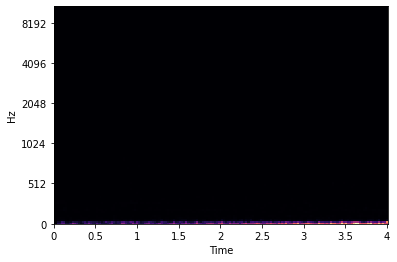

In [9]:
librosa.display.specshow(ps,y_axis='mel',x_axis='time')

In [10]:
y,sr=librosa.load('/content/gdrive/My Drive/fold3/12647-3-1-0.wav')
ps=librosa.feature.melspectrogram(y=y,sr=sr)
ps.shape

(128, 52)

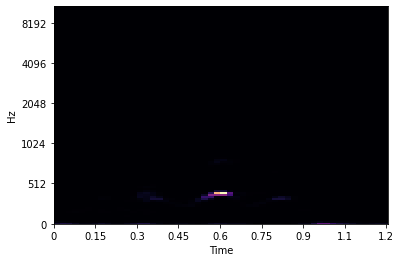

In [11]:
librosa.display.specshow(ps,y_axis='mel',x_axis='time')

Iterating over all files


In [12]:
array = [3,5]
data=data.loc[data['fold'].isin(array)]
data.shape

(1597, 4)

In [13]:
data['path']='fold'+data['fold'].astype('str')+'/'+data['slice_file_name'].astype('str')

In [14]:
D=[]
for row in data.itertuples():
  y,sr=librosa.load('/content/gdrive/My Drive/'+ row.path,duration=2.97)
  ps=librosa.feature.melspectrogram(y=y,sr=sr)
  if ps.shape!=(128,128): continue
  D.append((ps,row.classID))

In [ ]:
len(D)

1597

Splitting for training and testing

In [15]:
random.shuffle(D)
train=D[:1500]
test=D[1500:]
x_train, y_train= zip(*train)
x_test, y_test= zip(*test)

In [16]:
y_train

(5,
 3,
 1,
 7,
 3,
 1,
 0,
 9,
 8,
 1,
 0,
 7,
 8,
 9,
 4,
 1,
 7,
 1,
 4,
 1,
 8,
 2,
 9,
 7,
 8,
 0,
 2,
 3,
 9,
 2,
 2,
 1,
 7,
 0,
 7,
 7,
 9,
 0,
 8,
 3,
 8,
 8,
 9,
 1,
 5,
 9,
 5,
 3,
 8,
 7,
 0,
 2,
 2,
 3,
 1,
 1,
 8,
 0,
 4,
 9,
 8,
 0,
 5,
 2,
 5,
 2,
 9,
 5,
 2,
 0,
 4,
 3,
 5,
 8,
 9,
 5,
 3,
 0,
 4,
 7,
 4,
 5,
 5,
 8,
 7,
 7,
 9,
 2,
 4,
 3,
 4,
 7,
 1,
 4,
 4,
 5,
 8,
 8,
 1,
 1,
 7,
 5,
 3,
 5,
 5,
 7,
 3,
 0,
 4,
 2,
 2,
 0,
 0,
 7,
 9,
 2,
 9,
 8,
 3,
 2,
 3,
 5,
 5,
 8,
 9,
 3,
 1,
 4,
 7,
 8,
 9,
 0,
 5,
 7,
 2,
 4,
 8,
 5,
 0,
 0,
 2,
 8,
 8,
 2,
 3,
 9,
 2,
 8,
 2,
 4,
 9,
 9,
 5,
 8,
 2,
 7,
 9,
 5,
 1,
 3,
 8,
 2,
 2,
 9,
 8,
 7,
 0,
 4,
 7,
 2,
 5,
 9,
 0,
 8,
 0,
 9,
 4,
 8,
 8,
 8,
 1,
 5,
 7,
 3,
 5,
 4,
 2,
 2,
 2,
 9,
 9,
 2,
 5,
 2,
 9,
 0,
 3,
 0,
 5,
 7,
 0,
 9,
 9,
 0,
 1,
 7,
 4,
 0,
 8,
 4,
 0,
 7,
 9,
 3,
 7,
 4,
 8,
 3,
 9,
 2,
 9,
 2,
 5,
 4,
 9,
 1,
 2,
 0,
 5,
 0,
 3,
 7,
 9,
 1,
 2,
 2,
 7,
 8,
 8,
 7,
 8,
 5,
 9,
 0,
 9,
 0,
 2,
 7,
 2,
 9,


Reshaping for CNN input

In [17]:
x_train=np.array([x.reshape( (128,128,1) ) for x in x_train])
x_test=np.array([x.reshape( (128,128,1) ) for x in x_test])

One-Hot encoding for classes

In [18]:
y_train=np.array(keras.utils.to_categorical(y_train,10))
y_test=np.array(keras.utils.to_categorical(y_test,10))

In [19]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [20]:
len(y_train[0])

10

Training the Model

In [21]:
model=Sequential()
input_shape=(128,128,1)

model.add(Conv2D(24,kernel_size=(5,5),strides=(1,1),input_shape=input_shape))
model.add(MaxPooling2D((4,2),strides=(4,2)))
model.add(Activation('relu'))

model.add(Conv2D(48,kernel_size=(5,5),padding='valid'))
model.add(MaxPooling2D((4,2),strides=(4,2)))
model.add(Activation('relu'))

model.add(Conv2D(48,kernel_size=(5,5),padding='valid'))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dropout(rate=0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(10))
model.add(Activation('softmax'))


In [22]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.fit(
    x=x_train,
    y=y_train,
    epochs=15,
    batch_size=128,
    validation_data=(x_test,y_test))

Epoch 1/15
12/12 [==============================] - 26s 2s/step - loss: 7.7932 - accuracy: 0.1384 - val_loss: 2.2265 - val_accuracy: 0.2371
Epoch 2/15
12/12 [==============================] - 24s 2s/step - loss: 2.5675 - accuracy: 0.2152 - val_loss: 2.1636 - val_accuracy: 0.2268
Epoch 3/15
12/12 [==============================] - 24s 2s/step - loss: 2.2730 - accuracy: 0.2439 - val_loss: 2.0662 - val_accuracy: 0.3196
Epoch 4/15
12/12 [==============================] - 24s 2s/step - loss: 2.1483 - accuracy: 0.2919 - val_loss: 2.0543 - val_accuracy: 0.3093
Epoch 5/15
12/12 [==============================] - 24s 2s/step - loss: 2.0833 - accuracy: 0.2917 - val_loss: 1.9724 - val_accuracy: 0.3402
Epoch 6/15
12/12 [==============================] - 24s 2s/step - loss: 2.0372 - accuracy: 0.3184 - val_loss: 1.8833 - val_accuracy: 0.3505
Epoch 7/15
12/12 [==============================] - 24s 2s/step - loss: 1.9401 - accuracy: 0.3224 - val_loss: 1.8169 - val_accuracy: 0.3711
Epoch 8/15
12/12 [==

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 24)      624       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 62, 24)        0         
_________________________________________________________________
activation (Activation)      (None, 31, 62, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 58, 48)        28848     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 29, 48)         0         
_________________________________________________________________
activation_1 (Activation)    (None, 6, 29, 48)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 25, 48)         5

In [24]:
pred=model.predict(x_test)

Defining function for finding the accuracy

In [25]:
def predict(x):
  for i in range(len(x)):
    max_prob=max(x[i])
    for j in range(len(x[i])):
      if x[i][j]==max_prob:
        x[i][j]=1
      else:
        x[i][j]=0
  return(x)
def performance(x,y):
  arr= np.sum(abs(x - y), axis = 1)
  arr=list(arr)
  zero=arr.count(0)
  accuracy=zero/len(arr)
  return(accuracy)
y_pred=predict(pred)
accuracy=performance(y_pred,y_test)
accuracy

0.5670103092783505

#Few Shot Learning


In [36]:
import keras 
from keras.layers import Activation, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random
import warnings
import io
warnings.filterwarnings('ignore')
from tensorflow.keras.datasets import mnist
from imutils import build_montages
import numpy as np
import cv2
import sys
import os
import tensorflow.keras.backend as K

In [37]:
from google.colab import files 
uploaded = files.upload()

Saving fsl.csv to fsl.csv


In [38]:
df = pd.read_csv(io.BytesIO(uploaded['fsl.csv']))
data=df[['slice_file_name','fold','classID','class']]
data.head()

,slice_file_name,fold,classID,class
0,100852-0-0-0.wav,5,0,air_conditioner
1,100852-0-0-1.wav,5,0,air_conditioner
2,100852-0-0-10.wav,5,0,air_conditioner
3,100263-2-0-121.wav,5,2,children_playing
4,100263-2-0-126.wav,5,2,children_playing


In [39]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [40]:
array = [3,5]
data=data.loc[data['fold'].isin(array)]
data['path']='fold'+data['fold'].astype('str')+'/'+data['slice_file_name'].astype('str')
len(data)

30

In [41]:
D=[]
for row in data.itertuples():
  y,sr=librosa.load('/content/gdrive/My Drive/'+ row.path,duration=2.97)
  ps=librosa.feature.melspectrogram(y=y,sr=sr)
  if ps.shape!=(128,128): continue
  D.append((ps,row.classID))

In [42]:
random.shuffle(D)
train=D
x_train, y_train= zip(*train)
x_train=np.array([x.reshape( (128,128,1) ) for x in x_train])

In [43]:
idx = [np.where(np.array(y_train)==i)[0] for i in range(0, 10)]
idx

[array([13, 21, 24]),
 array([0, 5, 8]),
 array([ 1, 11, 23]),
 array([ 3, 12, 20]),
 array([2, 4, 7]),
 array([ 9, 10, 19]),
 array([], dtype=int64),
 array([ 6, 22, 26]),
 array([15, 17, 25]),
 array([14, 16, 18])]

In [44]:
pairImages = []
pairLabels = []
a=[0,1,2,3,4,5,7,8,9]
# loop over all images
for i in a:
  label=idx[i][0]
  currentImage=x_train[label]
  label2=idx[i][1]
  posImage=x_train[label2]
  pairImages.append([currentImage, posImage])
  pairLabels.append([1])
   
  # Neg sample 1
  negIdx = np.where(y_train != i)[0]
  negImage = x_train[np.random.choice(negIdx)]
  pairImages.append([currentImage, negImage])
  pairLabels.append([0])
 
  # Positive sample 2
  label1= idx[i][0]
  currentImage = x_train[label1]
  label2= idx[i][2]
  posImage = x_train[label2]
  pairImages.append([currentImage, posImage])
  pairLabels.append([1])

  # Negative Sample 2
  negIdx = np.where(y_train != i)[0]
  negImage = x_train[np.random.choice(negIdx)]
  pairImages.append([currentImage, negImage])
  pairLabels.append([0])

In [45]:
x1=[]
x2=[]
for i in range(36):
  x1.append(pairImages[i][0])
  x2.append(pairImages[i][1])


In [46]:
x1=np.array(x1)
x2=np.array(x2)

Preparing Testing Data


In [47]:
from google.colab import files 
uploaded = files.upload()

Saving fsl_testing.csv to fsl_testing.csv


In [48]:
df1 = pd.read_csv(io.BytesIO(uploaded['fsl_testing.csv']))
data1=df1[['slice_file_name','fold','classID','class']]
data1.head()

,slice_file_name,fold,classID,class
0,146714-0-0-49.wav,3,0,air_conditioner
1,144068-5-4-3.wav,3,5,engine_idling
2,12647-3-3-0.wav,3,3,dog_bark
3,111671-8-0-9.wav,5,8,siren
4,104998-7-17-14.wav,5,7,jackhammer


In [49]:
array = [3,5]
data1=data1.loc[data1['fold'].isin(array)]
data1['path']='fold'+data1['fold'].astype('str')+'/'+data1['slice_file_name'].astype('str')

In [50]:
D1=[]
for row in data1.itertuples():
  y,sr=librosa.load('/content/gdrive/My Drive/'+ row.path,duration=2.97)
  ps=librosa.feature.melspectrogram(y=y,sr=sr)
  if ps.shape!=(128,128): continue
  D1.append((ps,row.classID))
random.shuffle(D1)
test=D1
x_test, y_test= zip(*test)
x_test=np.array([x.reshape( (128,128,1) ) for x in x_test])

In [51]:
pairImages1 = []
pairLabels1 = []
# loop over all images
for idxA in range(len(D1)):
	currentImage = x_test[idxA]
	label = y_test[idxA]
	idxB = np.random.choice(idx[label])
	posImage = x_train[idxB]
	pairImages1.append([currentImage, posImage])
	pairLabels1.append([1])
   
  # Neg sample
	negIdx = np.where(y_train != label)[0]
	negImage = x_train[np.random.choice(negIdx)]
	pairImages1.append([currentImage, negImage])
	pairLabels1.append([0])
ytest=np.array(pairLabels1)
y=np.array(pairLabels)
xtest1=[]
xtest2=[]
for i in range(len(pairLabels1)):
  xtest1.append(pairImages1[i][0])
  xtest2.append(pairImages1[i][1])
xtest1=np.array(xtest1)
xtest2=np.array(xtest2)

Compiling Siamese Network

In [52]:
import keras 
from keras.layers import Dense, MaxPooling2D, Convolution2D, Dropout, Input, Flatten, Subtract, merge
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.models import Model
import pandas as pd
from keras import backend as K
from keras.layers import Lambda

inp_1 = Input(shape=(128,128,1))
conv_1 = Convolution2D(24,(5,5),activation='relu')(inp_1)
max_2 = MaxPooling2D((4,2),strides=(4,2))(conv_1)
conv_3 = Convolution2D(48,(5,5),activation='relu')(max_2)
max_4 = MaxPooling2D((4,2),strides=(4,2))(conv_3)
conv_5 = Convolution2D(48,(5,5),activation='relu')(max_4)
fcl = Flatten()(conv_5)
dense_1 = Dense(64,activation='relu')(fcl)

inp_2 = Input(shape=(128,128,1))
conv2_1 = Convolution2D(24,(5,5),activation='relu')(inp_2)
max2_2 = MaxPooling2D((4,2),strides=(4,2))(conv2_1)
conv2_3 = Convolution2D(48,(5,5),activation='relu')(max2_2)
max2_4 = MaxPooling2D((4,2),strides=(4,2))(conv2_3)
conv2_5 = Convolution2D(48,(5,5),activation='relu')(max2_4)
fcl2 = Flatten()(conv2_5)
dense2_1 = Dense(64,activation='relu')(fcl2)

dense_layer = Lambda(lambda x: K.abs(x[0]-x[1]))([dense_1, dense2_1])

output = Dense(1,activation='sigmoid')(dense_layer)

siamese_net = Model(inputs=[inp_1,inp_2],outputs=output)

print(siamese_net.summary())

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 124, 124, 24) 624         input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 124, 124, 24) 624         input_6[0][0]                    
____________________________________________________________________________________________

In [53]:
siamese_net.compile(loss='binary_crossentropy',optimizer=keras.optimizers.SGD(lr=0.001),metrics = ['accuracy'])

In [54]:
y=np.array(pairLabels)

Fitting the Model

In [55]:
siamese_net.fit(
    [x1,x2],
    y=y,
    verbose=1,
    epochs=50,
    batch_size=128,
    validation_data=([xtest1,xtest2],ytest))

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.8629 - accuracy: 0.5278 - val_loss: 0.8342 - val_accuracy: 0.5833
Epoch 2/50
1/1 [==============================] - 1s 914ms/step - loss: 0.6127 - accuracy: 0.6944 - val_loss: 0.9373 - val_accuracy: 0.5833
Epoch 3/50
1/1 [==============================] - 1s 908ms/step - loss: 0.5026 - accuracy: 0.7222 - val_loss: 0.8334 - val_accuracy: 0.5833
Epoch 4/50
1/1 [==============================] - 1s 896ms/step - loss: 0.4681 - accuracy: 0.7222 - val_loss: 0.7818 - val_accuracy: 0.5833
Epoch 5/50
1/1 [==============================] - 1s 924ms/step - loss: 0.4461 - accuracy: 0.8889 - val_loss: 0.7391 - val_accuracy: 0.5833
Epoch 6/50
1/1 [==============================] - 1s 911ms/step - loss: 0.4294 - accuracy: 0.8889 - val_loss: 0.7176 - val_accuracy: 0.5833
Epoch 7/50
1/1 [==============================] - 1s 899ms/step - loss: 0.4147 - accuracy: 0.8889 - val_loss: 0.6836 - val_accuracy: 0.5833
Epoch 8/50
1/1 [=======

#Demo on real life data set.

In [57]:
from google.colab import files 
uploaded = files.upload()

Saving realdata.csv to realdata (2).csv


In [58]:
data2 = pd.read_csv(io.BytesIO(uploaded['realdata.csv']))
data2.head()

,name,classID
0,GirlCrying_1.wav,0
1,GirlCrying_2.wav,0
2,GirlLaughing_1.wav,1
3,Glass_1.wav,2
4,Glass_2.wav,2


In [59]:
data2['path']=data2['name'].astype('str')

In [60]:
D2=[]
for row in data2.itertuples():
  y,sr=librosa.load('/content/gdrive/My Drive/real_life_data/'+ row.path,duration=2.97)
  ps=librosa.feature.melspectrogram(y=y,sr=sr)
  if ps.shape!=(128,128): continue
  D2.append((ps,row.classID))
random.shuffle(D2)
real_test=D2
xreal_test, yreal_test= zip(*real_test)
xreal_test=np.array([x.reshape( (128,128,1) ) for x in xreal_test]) 

In [77]:
idx1 = [np.where(np.array(yreal_test)==i)[0] for i in range(0, 8)]
idx1

[array([ 3, 18]),
 array([6]),
 array([ 0,  8, 13]),
 array([ 5, 10, 17]),
 array([16]),
 array([15]),
 array([ 1,  4, 12]),
 array([ 7,  9, 19])]

In [79]:
#example class 0
pairImages2 = []
pairLabels2 = []
a=[0,2,3,6,7]

# loop over all images
for i in a:
  label=idx1[i][0]
  currentImage=xreal_test[label]
  label2=idx1[i][1]
  posImage=xreal_test[label2]
  pairImages2.append([currentImage, posImage])
  pairLabels2.append([1])
   
  # Neg sample
  negIdx = np.where(np.array(yreal_test) != label)[0]
  negImage = xreal_test[np.random.choice(negIdx)]
  pairImages2.append([currentImage, negImage])
  pairLabels2.append([0])
yrealtest=np.array(pairLabels2)
xrealtest1=[]
xrealtest2=[]
for i in range(len(pairLabels2)):
  xrealtest1.append(pairImages2[i][0])
  xrealtest2.append(pairImages2[i][1])
xrealtest1=np.array(xrealtest1)
xrealtest2=np.array(xrealtest2)

We are acheiving test accuracy of around 56% which is not so good. The reason of low accuracy is that we didnt use large data for training. Instead we used a sample of data so that it requires less amount of time for training.